<a href="https://colab.research.google.com/github/adielws/covid19-questions/blob/master/covid19_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importando *dataset* do Google Drive



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from google.colab import drive
drive.mount('/content/drive/')
!ls '/content/drive/Shared drives/TRABALHO_POS/FULL.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/Shared drives/TRABALHO_POS/FULL.csv'


In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/FULL.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
data.head()

data              usuario  ... longitude hashtags
0  2020-03-23 18:51:14             Gaboardi  ...       NaN       []
1  2020-03-18 03:18:14   Seu Zé da Farmácia  ...       NaN       []
2  2020-03-29 12:09:27  Marília Oliveira 🇧🇷  ...       NaN       []
3  2020-04-01 21:11:07                    🚩  ...       NaN       []
4  2020-03-19 17:49:40       Nova Impressão  ... -15.77691       []

[5 rows x 13 columns]

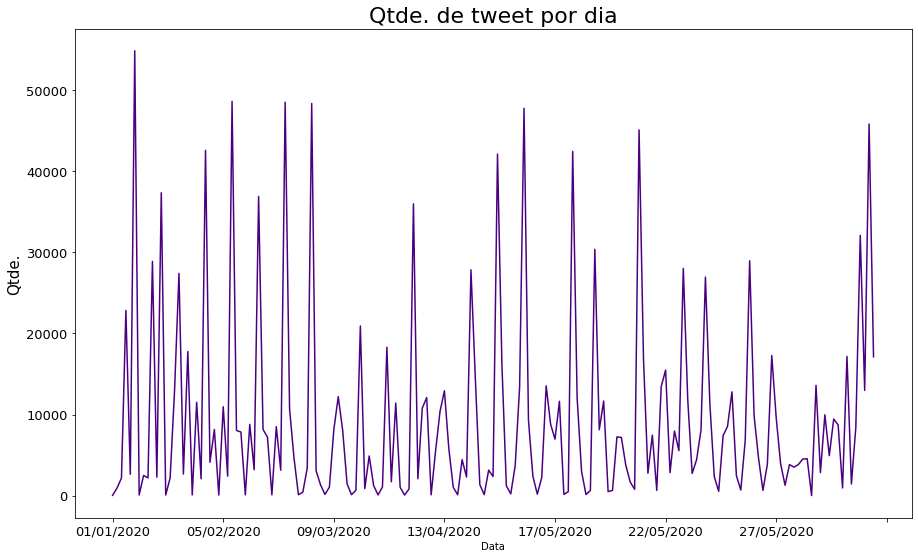

In [ ]:
import matplotlib.pyplot as plt
data['data'] = pd.to_datetime(data["data"])
df = data.groupby(pd.to_datetime(data.data).dt.strftime('%d/%m/%Y')).data.count()

ax = df.plot(kind='line', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Qtde. de tweet por dia", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Data", fontsize=10);
plt.show()

# **Qtde. de Tweets por Período**

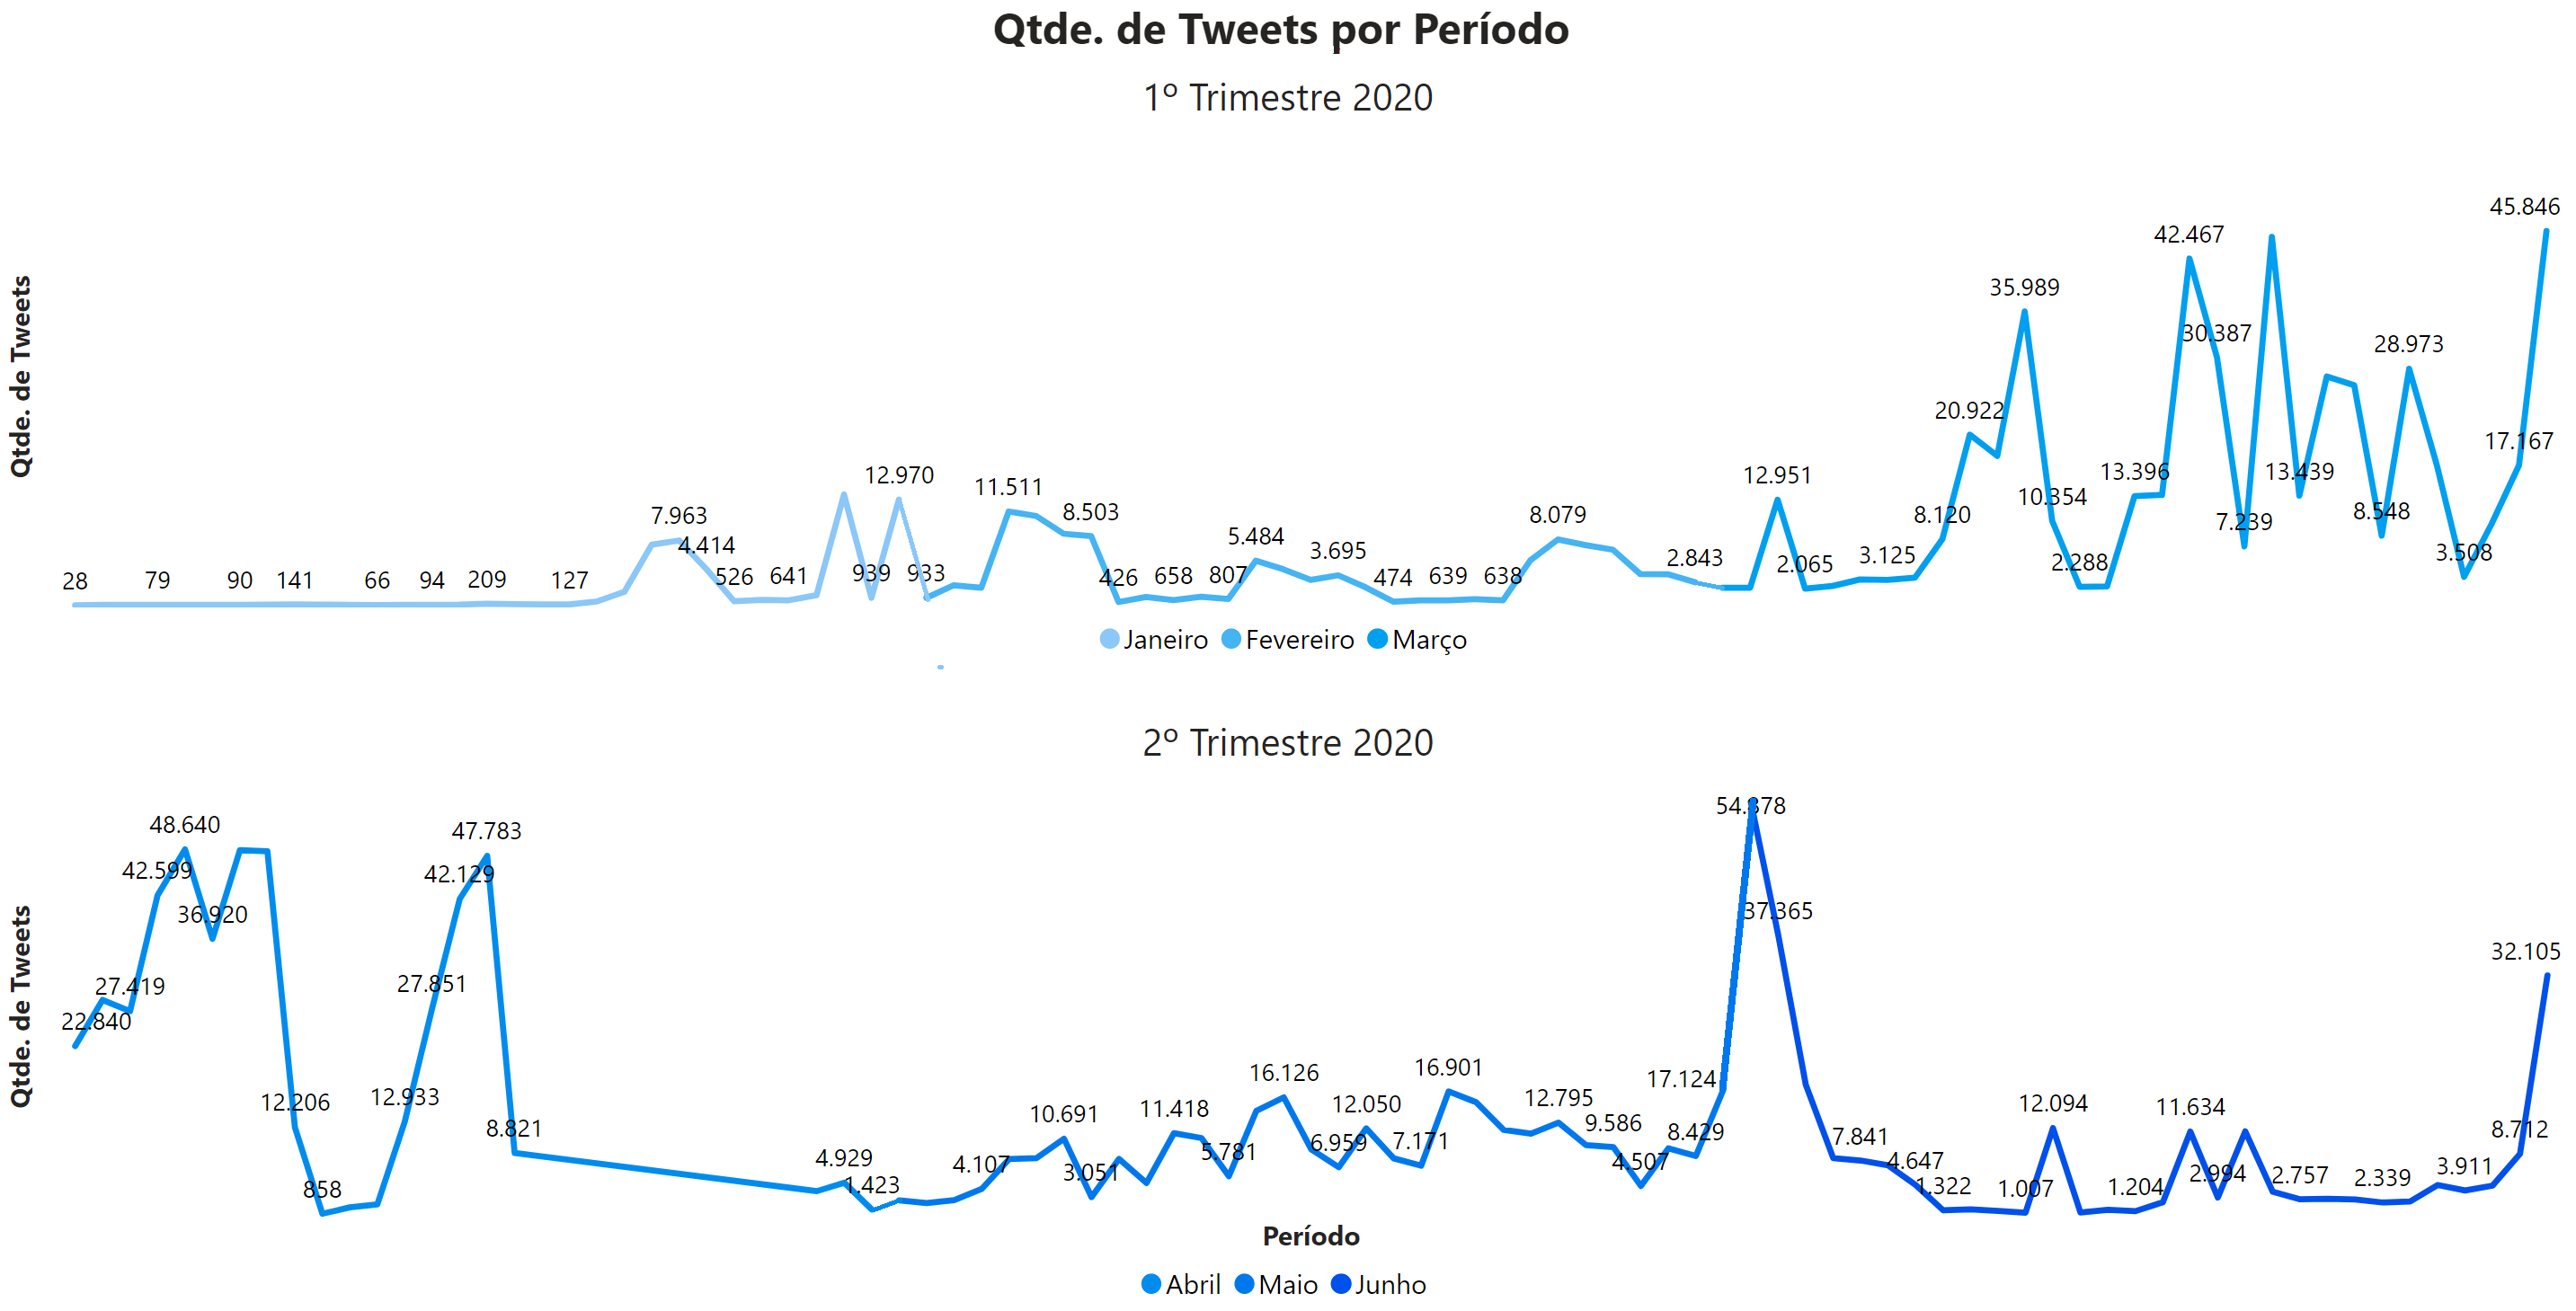

#**Mapa de calor de tweets por Mês*** [link](https://drive.google.com/file/d/1zskDZ0LFpK-a9LYheOwZ6g_pTwxAuKBI/view?usp=sharing)

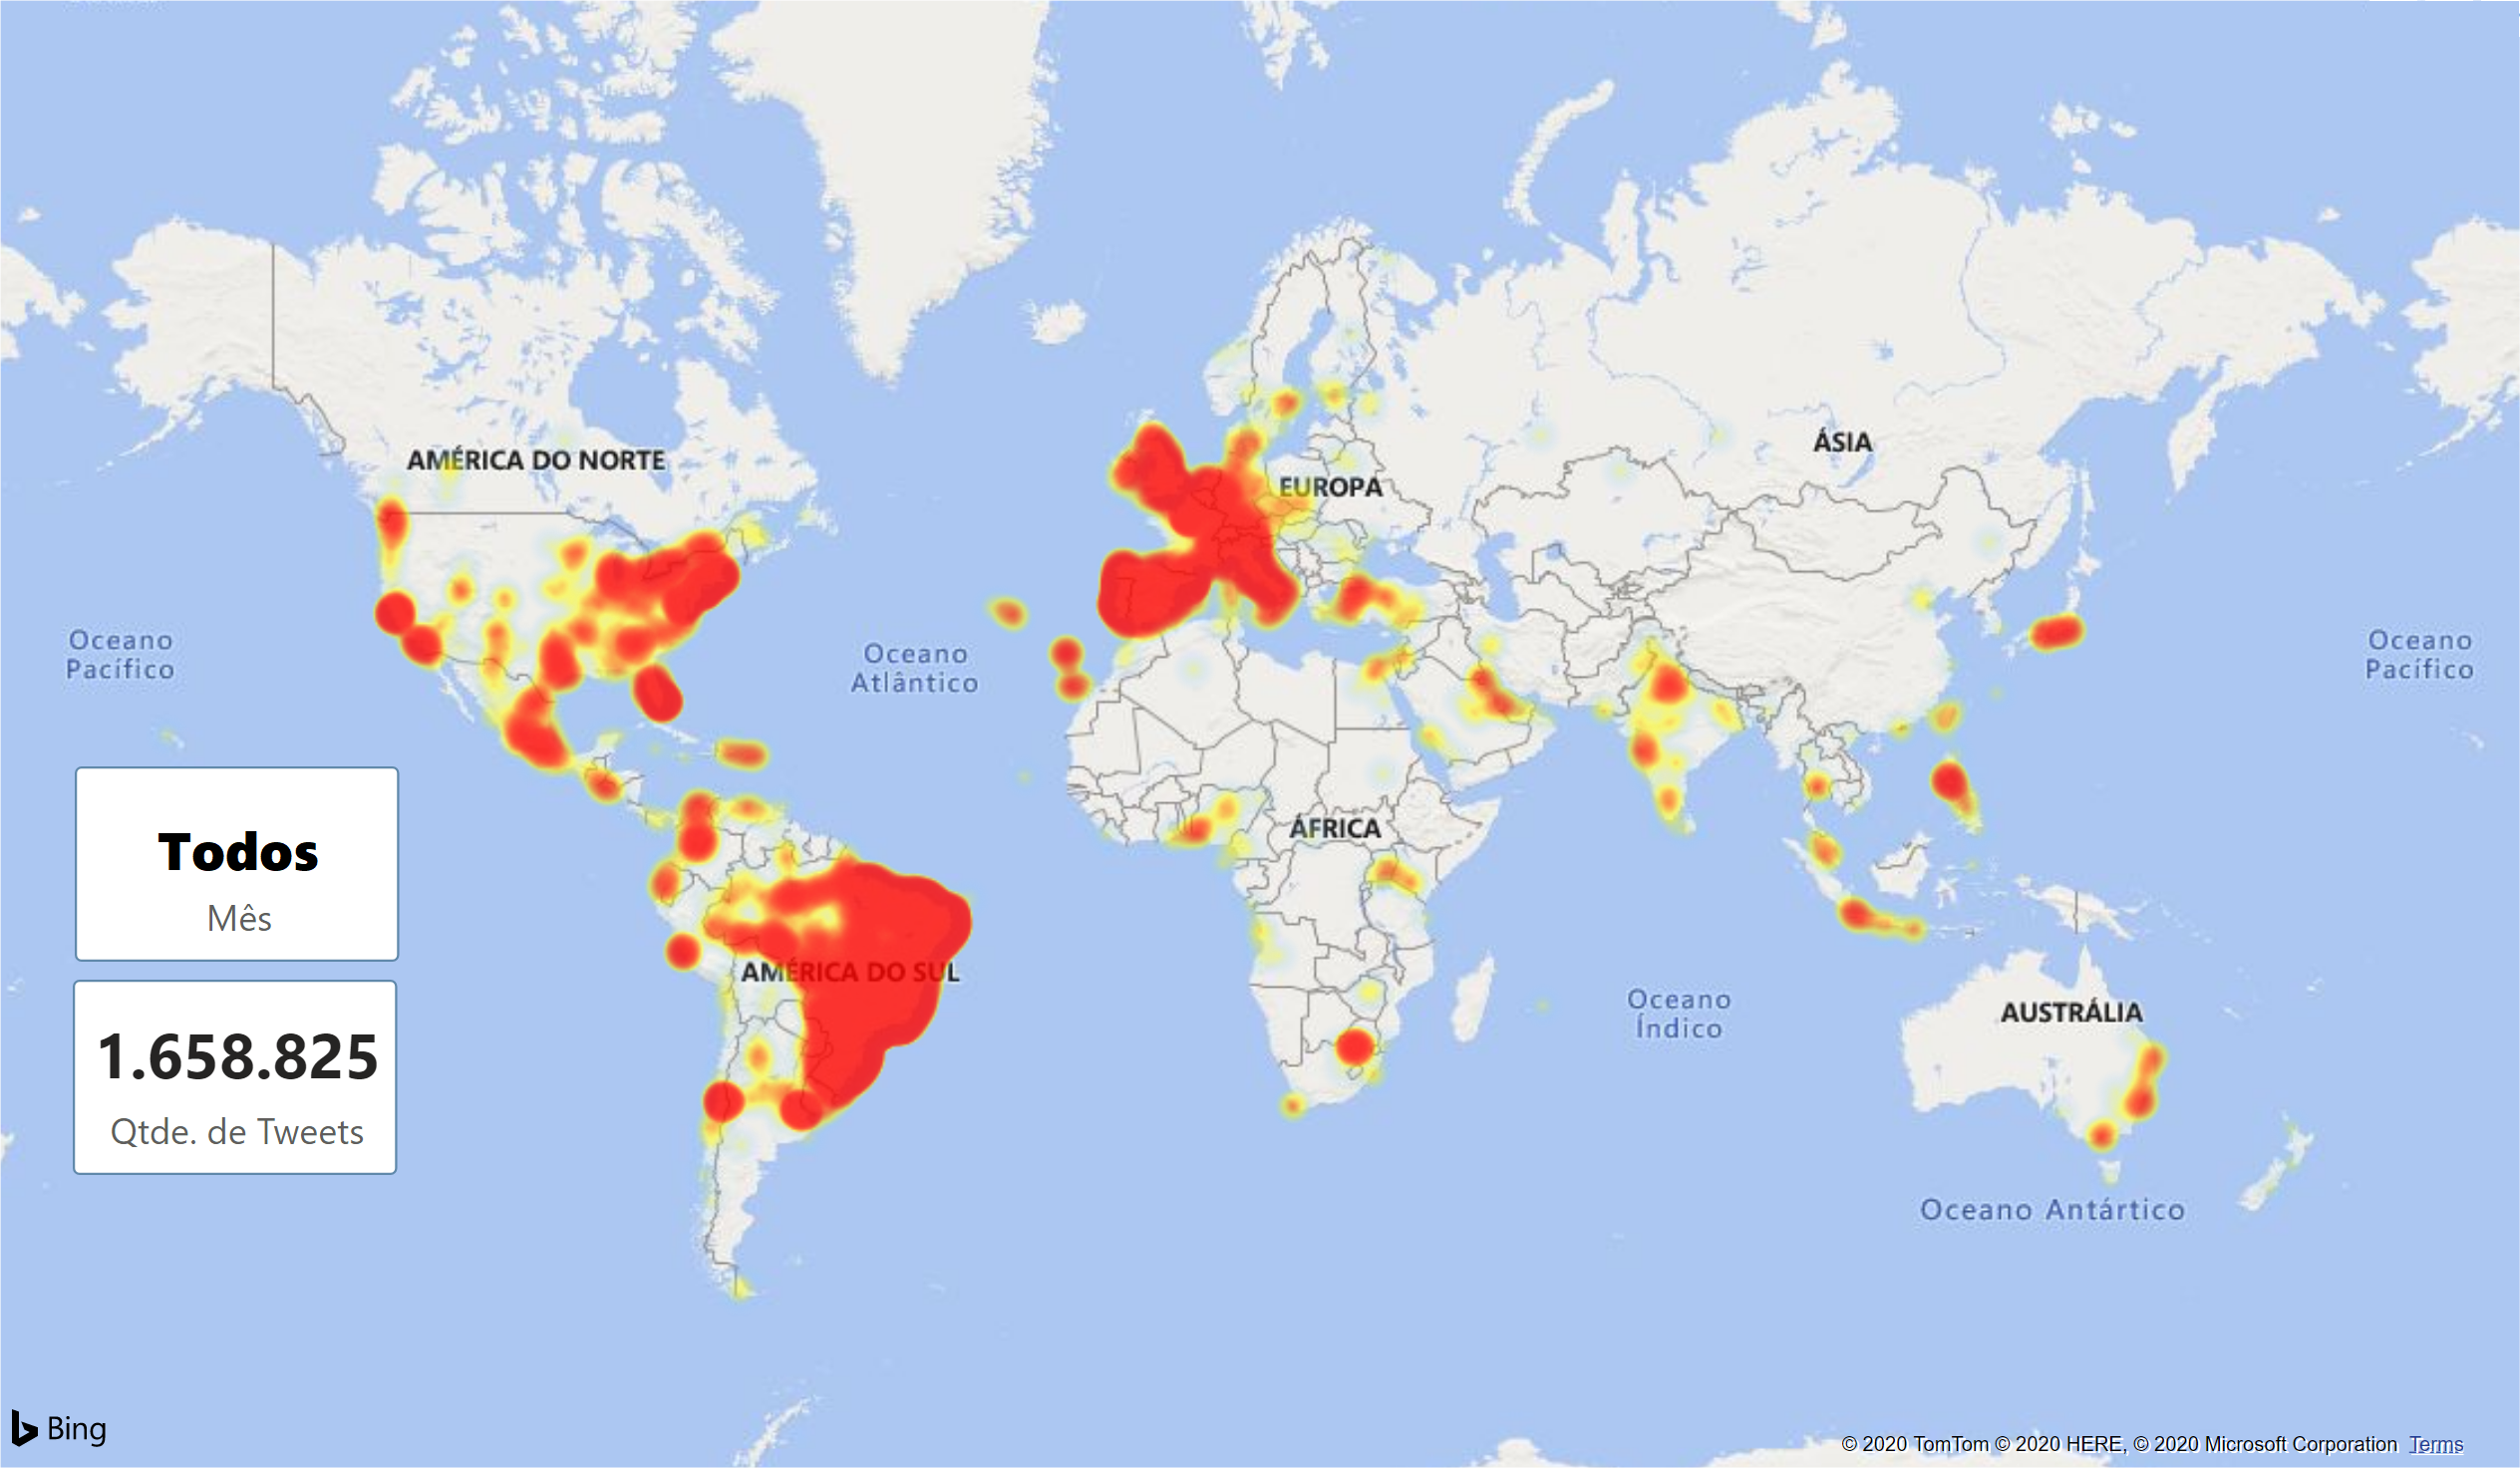

In [ ]:
data['data'] = pd.to_datetime(data["data"])
conditions = [
    (data.data.dt.hour >= 0) & (data.data.dt.hour <=6),
    (data.data.dt.hour > 6) & (data.data.dt.hour <=12),
    (data.data.dt.hour > 12) & (data.data.dt.hour <=18),
    (data.data.dt.hour > 18) & (data.data.dt.hour <=23)
    ]
partes_do_dia = ['MADRUGADA', 'MANHÃ', 'TARDE', 'NOITE']

data['partes_dia'] = np.select(conditions, partes_do_dia)
data['dia_da_semana'] = data.data.dt.day_name()


data['dia_da_semana'] = pd.Categorical(data['dia_da_semana'], categories=
    ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True)

data['partes_dia'] = pd.Categorical(data['partes_dia'], categories=
    ['MADRUGADA', 'MANHÃ','TARDE','NOITE'],
    ordered=True)

data.head()

data              usuario  ... partes_dia dia_da_semana
0 2020-03-23 18:51:14             Gaboardi  ...      TARDE        Monday
1 2020-03-18 03:18:14   Seu Zé da Farmácia  ...  MADRUGADA     Wednesday
2 2020-03-29 12:09:27  Marília Oliveira 🇧🇷  ...      MANHÃ        Sunday
3 2020-04-01 21:11:07                    🚩  ...      NOITE     Wednesday
4 2020-03-19 17:49:40       Nova Impressão  ...      TARDE      Thursday

[5 rows x 15 columns]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127463 missing from current font.
  font.

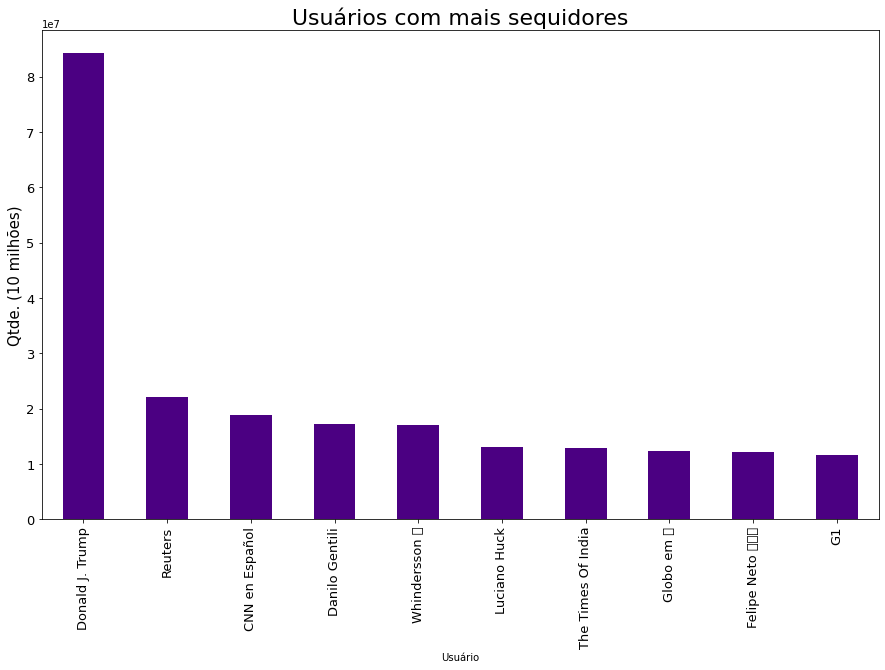

In [ ]:
df0 = data.groupby('usuario').seguidores.max()
df0.sort_values(ascending=False, inplace=True)

ax = df0[:10].plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Usuários com mais sequidores", fontsize=22)
ax.set_ylabel("Qtde. (10 milhões)", fontsize=15);
ax.set_xlabel("Usuário", fontsize=10);
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127801 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129496 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127995 missing from current font.
  font.se

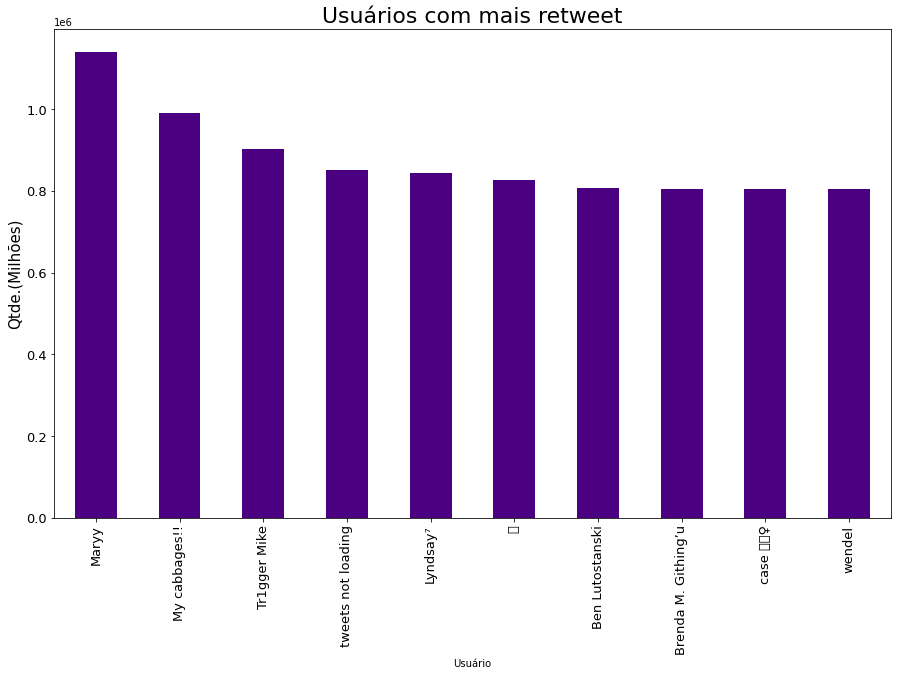

In [ ]:
df0 = data.groupby('usuario').retweet.max()
df0.sort_values(ascending=False, inplace=True)

ax = df0[:10].plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Usuários com mais retweet", fontsize=22)
ax.set_ylabel("Qtde.(Milhões)", fontsize=15);
ax.set_xlabel("Usuário", fontsize=10);
plt.show()

In [ ]:
df0 = data.sort_values(by = 'retweet', ascending=False)[:10]
retweet = df0[['data','retweet','usuario','texto']]

retweet = retweet.rename(columns={'data' : 'Data', 'retweet' : 'Qtde. de retweet', 'usuario' : 'Usuário'})

retweet

Data  ...                                              texto
728919  2020-05-21 22:45:41  ...   RT @BTS_twt: Never Not 💜 https://t.co/Ag9oUTJvrN
1111110 2020-05-28 17:51:41  ...  RT @RyanSesselman: She’s tough. But she’s wort...
898066  2020-03-22 16:01:33  ...  RT @JeffreeStar: I’m going to give away $30,00...
298216  2020-05-28 16:57:51  ...  RT @1kingmyles: What a headline https://t.co/x...
426142  2020-05-21 12:10:27  ...        RT @BTS_twt: teamwork makes the dream work.
1257455 2020-03-16 23:11:08  ...  RT @gnuman1979: Quarantine day 6. https://t.co...
571894  2020-05-31 16:06:04  ...  RT @andymilonakis: Congratulations to the Astr...
184114  2020-05-31 21:22:35  ...  RT @andymilonakis: Congratulations to the Astr...
815527  2020-05-31 20:55:19  ...  RT @andymilonakis: Congratulations to the Astr...
329633  2020-05-31 18:41:26  ...  RT @andymilonakis: Congratulations to the Astr...

[10 rows x 4 columns]

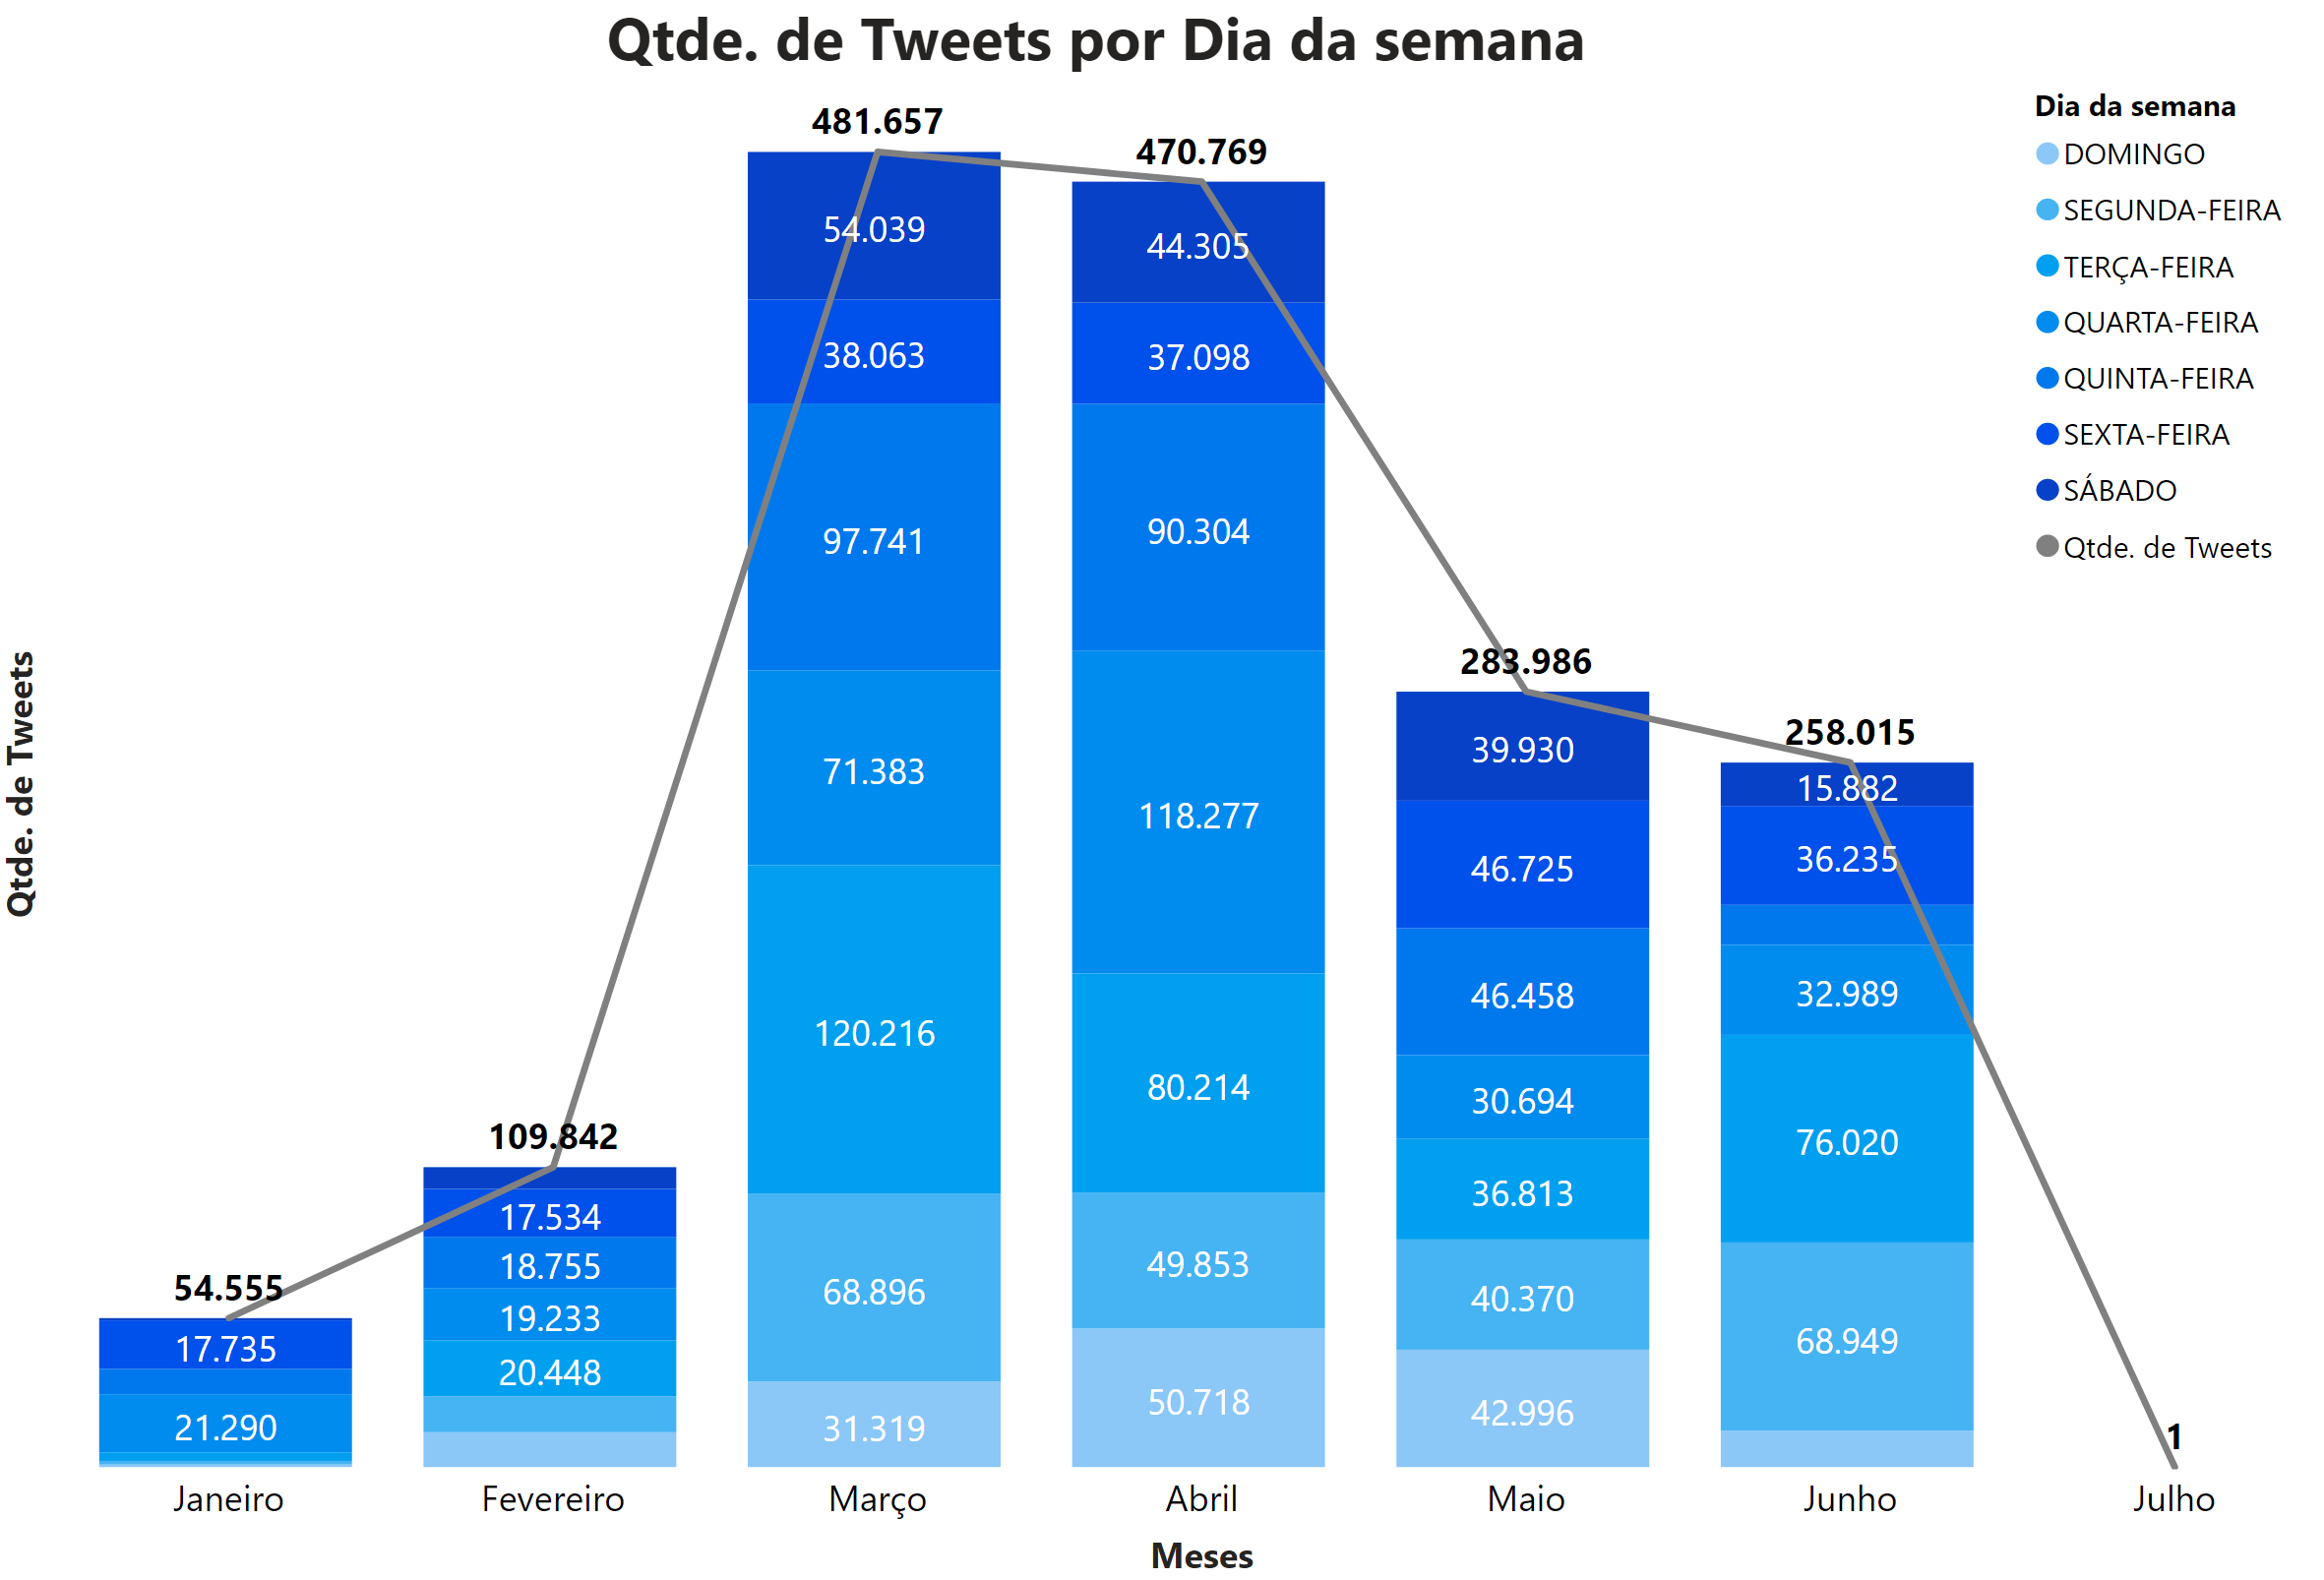

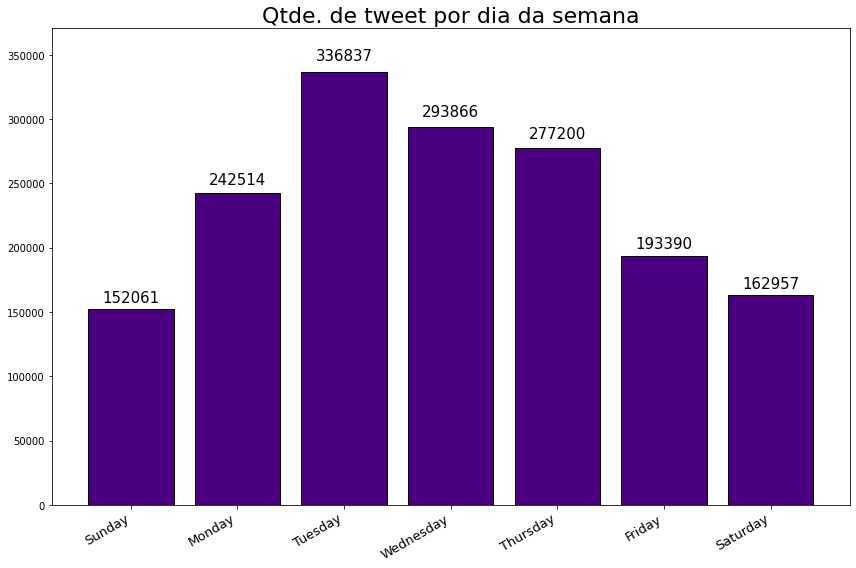

In [ ]:
dia_semana = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

n_bars = list(range(len(dia_semana)))
df1 = data.groupby('dia_da_semana').dia_da_semana.count()

fig, ax = plt.subplots(figsize=(12,8))
fig.autofmt_xdate()
bars = plt.bar(n_bars, df1, align='center', color='indigo', edgecolor='black')
plt.xticks(n_bars, dia_semana, fontsize=13)# Add text labels to the top of the bars

def rotate_label(bars):
   for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2., 1.02 * height,'%d' % int(height),ha='center', va='bottom', fontsize=15)# Labels and plotting
rotate_label(bars)
plt.ylim([0, max(df1)*1.1])
plt.title('Qtde. de tweet por dia da semana', fontsize=22)
plt.tight_layout()
plt.show()

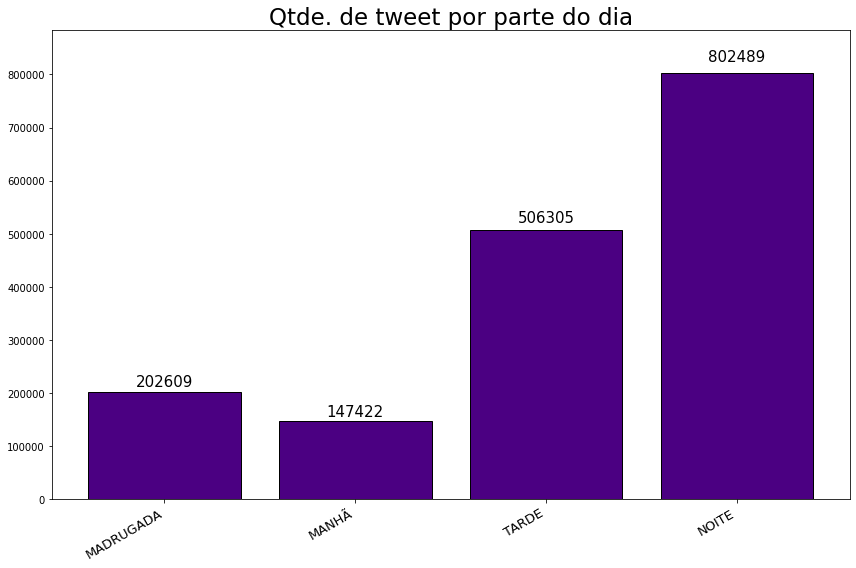

In [ ]:
n_bars = list(range(len(partes_do_dia)))
df2 = data.groupby('partes_dia').dia_da_semana.count()

fig, ax = plt.subplots(figsize=(12,8))
fig.autofmt_xdate()
bars = plt.bar(n_bars, df2, align='center', color='indigo', edgecolor='black')
plt.xticks(n_bars, partes_do_dia, fontsize=13)# Add text labels to the top of the bars
def rotate_label(bars):
   for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2., 1.02 * height,'%d' % int(height),ha='center', va='bottom', fontsize=15)# Labels and plotting
rotate_label(bars)
plt.ylim([0, max(df2)*1.1])
plt.title('Qtde. de tweet por parte do dia', fontsize=23)
plt.tight_layout()
plt.show()

In [ ]:
G1 = data[data.usuario == 'G1'][['data','seguidores']]

SBT = data[data.usuario == 'SBT (de 🏠)'][['data','seguidores']]

RECORD = data[data.usuario == 'Record TV'][['data','seguidores']]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0, flags=flags)


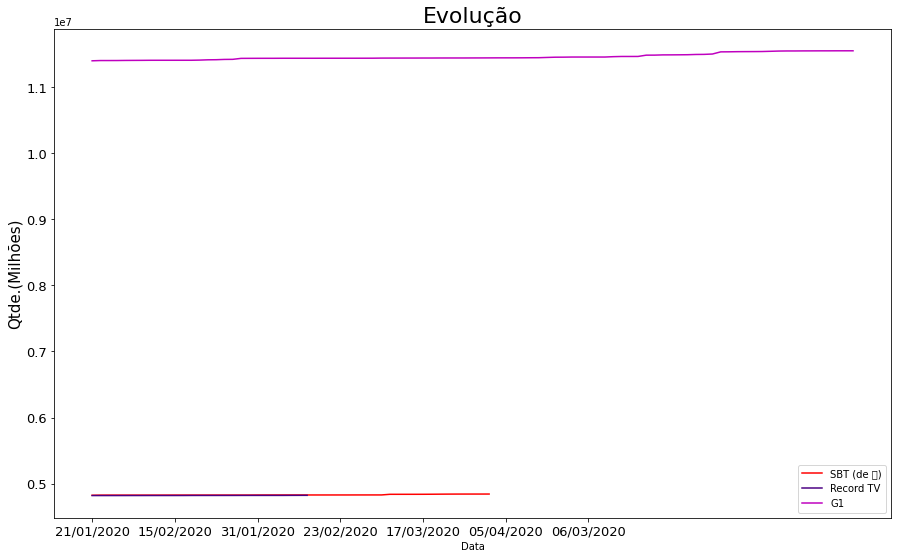

In [ ]:
linha1 = SBT.groupby([pd.to_datetime(SBT.data).dt.strftime('%d/%m/%Y')]).seguidores.max()
linha1.sort_values(ascending=True, inplace=True)

linha2 = RECORD.groupby([pd.to_datetime(RECORD.data).dt.strftime('%d/%m/%Y')]).seguidores.max()
linha2.sort_values(ascending=True, inplace=True)

linha3 = G1.groupby([pd.to_datetime(G1.data).dt.strftime('%d/%m/%Y')]).seguidores.max()
linha3.sort_values(ascending=True, inplace=True)

ax = linha1.plot(kind='line', figsize=(15,9), color="r", fontsize=13);
ax = linha2.plot(kind='line', figsize=(15,9), color="indigo", fontsize=13);
ax = linha3.plot(kind='line', figsize=(15,9), color="m", fontsize=13);

ax.set_alpha(0.8)
ax.set_title("Evolução", fontsize=22)
ax.set_ylabel("Qtde.(Milhões)", fontsize=15);
ax.set_xlabel("Data", fontsize=10);
ax.legend(['SBT (de 🏠)', 'Record TV','G1'])
plt.show()

# Analisando a Frequência das Hashtags


Nesta seção, vamos visualizar a frequência das hashtags no nosso dataset. Para isso, vamos utilizar um gráfico conhecido como nuvem de palavras. Nós vamos implementar usando a biblioteca [Wordcloud](https://https://github.com/amueller/word_cloud).

In [ ]:
!pip install wordcloud -q

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Nós vamos criar uma série a partir do atributo *hashtag* do dataframe. Nós vamos incluir nessa série apenas os valores não faltantes.

In [ ]:
hashtags = data.dropna(subset=['hashtags'])['hashtags']
hashtags.describe()

count     1658825
unique      63838
top            []
freq      1495569
Name: hashtags, dtype: object

Podemos ver que cada item da série é um array de strings, cujos valores são as hashtags de uma linha do dataframe. Portanto, precisamos separar esses valores em strings individuais, para que possamos calcular sua frequência.

Mas antes vamos remover da série os itens cujo valor é um array vazio. Eles são os itens que têm o valor '[]'.

In [ ]:
hashtags = hashtags[hashtags != '[]'] # removendo itens que não tem hashtags
hashtags.describe()

count          163256
unique          63837
top       ['COVID19']
freq             9951
Name: hashtags, dtype: object

In [ ]:
hashtags.unique() # visualizando valores únicos. Veja que não existe mais o valor '[]'.

array(["['tvPT']", "['Venezuela']", "['Covid_19']", ...,
       "['IndianWells', 'Covid_19']",
       "['Coronavirus', 'COVID19', 'Venezia', 'Civile']",
       "['FranklinDurationIncomeTrust', 'Stock']"], dtype=object)

Agora vamos dividir os arrays em palavras e, por fim.

In [ ]:
def split(item):
  "This parses a string of a list of words into an array of individual words"
  tags = str(item).translate({ord(i): None for i in ' []\''})
  return tags.split(',')

hashtags = hashtags.apply(split)
hashtags = np.concatenate(hashtags.values.tolist())

Vamos concatenar todas as palavras em uma só, separando-as com espaço.

Em seguida, criaremos a nuvem de palavras usando a biblioteca Wordcloud.

Por fim, vamos exibi-la usando a biblioteca Matplotlib.

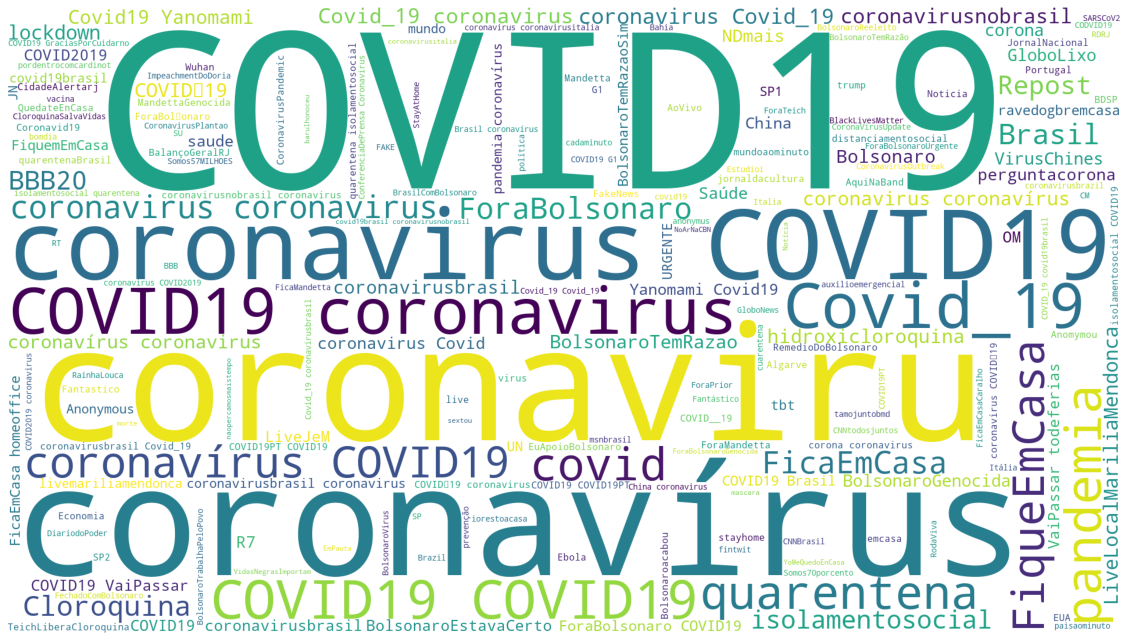

In [ ]:
# concatenando as palavras
all_hashtags = " ".join(s for s in hashtags)

# criando a nuvem de palavras
wordcloud = WordCloud(background_color="white", width=1920, height=1080).generate(all_hashtags)

# mostrando a imagem final
fig, ax = plt.subplots(figsize=(20,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Observe que há várias ocorrências de tags repetidas, como *COVID19*. Será necessário fazer mais um tratamento nos dados das hashtags para agrupar essas ocorrências repetidas.

Após o tratamento, vamos escrever aqui os resultados. Mas já podemos observar que as hashtags mais postadas foram *#COVID19*, *#coronavirus*, *#FiqueEmCasa*, *#pandemia* e *#quarentena*.

#Extraindo perguntas do *dataset original*

In [ ]:
import re

def get_questions(txt):
  "gets  all the questions that are in the txt"
  return re.findall('[A-Za-z].*\?', txt)

In [ ]:
# get tweet series
tweets = data.texto
tweets.head(5)

0    @BolsonaroSP Cade o fundão deputado??? Congres...
1    Em ação preventiva, o Governo do Estado suspen...
2    Incrível como os defensores do fim do distanci...
3    Fumaça de cigarro pode propagar coronavírus? h...
4    🚨Todos juntos contra COVID-19💪\n\nSolicite seu...
Name: texto, dtype: object

In [ ]:
# apply 'get_questions' in all tweets
questions_arrays = tweets.apply(get_questions)
print(questions_arrays)

0                 [BolsonaroSP Cade o fundão deputado???]
1                                                      []
2                                                      []
3          [Fumaça de cigarro pode propagar coronavírus?]
4                                                      []
                                ...                      
1658820             [unis*l: que tal uma aula no juri???]
1658821                             [Qual a sua opinião?]
1658822                                                []
1658823                                                []
1658824                                                []
Name: texto, Length: 1658825, dtype: object


A fazer: aplicar a função de extrair perguntas sobre o conteúdo completo do tweet. Para isso, será necessário baixar o texto usando a URL do tweet. Para isso, vamos obter as short URLs dos tweets que as têm.

In [ ]:
# obtain full content for tweet series
def has_URL(tweet):
  "Scan through string looking for a tweet URL, returning True if it has or False otherwise."
  return re.search('https.*$', tweet) != None  

def get_URL(tweet):
  return re.findall('https.*$', tweet)

has = tweets[tweets.apply(has_URL)]
urls = has.apply(get_URL)
display(urls)

1          [https://t.co/EPFXOMtwSY]
2          [https://t.co/oEyXDF9cDy]
3          [https://t.co/JT1oMiUCXf]
4          [https://t.co/p6wcoomynZ]
5          [https://t.co/dj4w3M7e5R]
                     ...            
1658817    [https://t.co/J1ZQnh78vN]
1658819    [https://t.co/0BlKnBWiDz]
1658822    [https://t.co/fEe66n5hn1]
1658823    [https://t.co/uVqLbZ9AgZ]
1658824    [https://t.co/g4wHwFf8Et]
Name: texto, Length: 1096275, dtype: object

Abaixo, vamos elaborar uma estratégia para obter o texto completo do tweet usando sua short URL.

In [ ]:
import tweepy

consumer_key = "vXpGl6obnpLwkP6OBqxIgvBX3"
consumer_secret = "rIOwNZ80HMqz9fkpKQ8XompdoCC0f11YmdI3jXTH2dyUM30rIM"

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth)

# Por enquanto, vou obter o texto completo usando o ID do tweet. 
# Posteriormente, desejo obter o texto completo a partir da short URL.
def get_full_text_using_id(tweet_id):
  status = api.get_status(tweet_id, tweet_mode = "extended")
  return status.full_text

tweet_id = 1240115265423147017
print(get_full_text_using_id(tweet_id))

Em ação preventiva, o Governo do Estado suspendeu as aulas da rede estadual até 31 de março. ⁣
⁣
Esta ação está alinhada às estratégias de combate à proliferação do novo Coronavírus (Covid-19) no Pará. ❌🦠⁣
⁣Somente a distribuição da merenda escolar será mantida🥤🍎⁣
⁣📚⁣ https://t.co/iUsQEbEi5C


#**Processando as palavras das frases**

In [ ]:
interrogacao ='?'
data['interrogativa'] = np.where(data['texto'].str.find(interrogacao)!= -1, True, False)
data.head()

data              usuario  ... dia_da_semana interrogativa
0 2020-03-23 18:51:14             Gaboardi  ...        Monday          True
1 2020-03-18 03:18:14   Seu Zé da Farmácia  ...     Wednesday         False
2 2020-03-29 12:09:27  Marília Oliveira 🇧🇷  ...        Sunday         False
3 2020-04-01 21:11:07                    🚩  ...     Wednesday          True
4 2020-03-19 17:49:40       Nova Impressão  ...      Thursday         False

[5 rows x 16 columns]

In [ ]:
data['interrogativa'].value_counts()

False    1486324
True      172501
Name: interrogativa, dtype: int64

In [ ]:
df1 = data[data['interrogativa'] != False]
df1 = df1[df1['idioma'] == 'pt']
df1.head()

data            usuario  ... dia_da_semana interrogativa
0  2020-03-23 18:51:14           Gaboardi  ...        Monday          True
3  2020-04-01 21:11:07                  🚩  ...     Wednesday          True
38 2020-06-25 11:09:19     Andreia Peraro  ...      Thursday          True
45 2020-04-06 15:44:36  Diorgenes Pandini  ...        Monday          True
57 2020-03-30 00:43:36      Valnei do Val  ...        Monday          True

[5 rows x 16 columns]

# **Gerar o dataset duvidasDB**

In [ ]:
df1.to_csv('duvidasDB.csv', sep=',', encoding='utf-8')

In [ ]:
textosPuros = df1['texto']
frases = textosPuros.str.lower()
frases[:2]

0    @bolsonarosp cade o fundão deputado??? congres...
3    fumaça de cigarro pode propagar coronavírus? h...
Name: texto, dtype: object

In [ ]:
textosQuebrados = [nltk.tokenize.word_tokenize(frase) for frase in frases] # Quebra frases por palavras

Junta todas as lista

In [ ]:
uniao_listas=[]
for i in range(len(textosQuebrados)):
  uniao_listas = [*uniao_listas,*textosQuebrados[i]]

In [ ]:
len(uniao_listas)

3592339

In [ ]:
stemmer = nltk.stem.RSLPStemmer()

radicais = [stemmer.stem(palavra) for palavra in uniao_listas]

print("Qtde. de radicais: ", len(radicais))

Qtde. de radicais:  3592339


Remove palavras com menos 2 letras, e palavras que contenha // (link)

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('http')

palavras_filtras = list(filter(lambda palavra: len(palavra) > 2 and palavra.find("//") == -1 and palavra not in stopwords, radicais))
print('Qtde. de radicais filtros: ',len(palavras_filtras))

Qtde. de radicais filtros:  1637451



Conta a frequência de cada radical

In [ ]:
freq_palavras = []
for palavra in palavras_filtras[:100]:
    freq_palavras.append(palavras_filtras.count(palavra))

mapa = list(zip(palavras_filtras, freq_palavras))

print("Pares: \n" + str(mapa))

Pares: 
[('bolsonarosp', 1303), ('cad', 3777), ('fund', 1009), ('deput', 435), ('congress', 205), ('est', 27504), ('sent', 1246), ('3bi', 2), ('olh', 1364), ('pandem', 20628), ('janel', 88), ('fumaç', 28), ('cigarr', 48), ('pod', 9258), ('propag', 214), ('coronavíru', 14191), ('ipratesmd', 1), ('dr_pamp', 5), ('ser', 18888), ('corr', 725), ('risc', 1057), ('term', 245), ('piolh', 68), ('sup', 303), ('resist', 176), ('uso', 2033), ('ivermectin', 964), ('está…', 85), ('prior', 92), ('covid19', 7660), ('florip', 25), ('isol', 11926), ('tal', 1503), ('notíc', 1154), ('boa', 1705), ('ind', 488), ('contr', 3667), ('míd', 522), ('corrupt', 106), ('est', 27504), ('faz', 11607), ('toc', 240), ('terr', 508), ('popul', 994), ('sã…', 28), ('josemedeirosmt', 49), ('ser', 18888), ('iss', 8675), ('algum', 3754), ('tip', 1291), ('aleatóri', 22), ('dem', 208), ('provoc', 139), ('pel', 6359), ('coronavíru', 14191), ('nov', 3450), ('york', 79), ('nov', 3450), ('epicentr', 169), ('pandem', 20628), ('cor',

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
frame_repeticao = pd.DataFrame(mapa,columns=['radical','repeticao'])
frame_repeticao.drop_duplicates(inplace=True)
frame_repeticao.sort_values(['repeticao'], ascending=False, inplace=True)
frame_repeticao.head(20)

radical  repeticao
5          est      27504
9       pandem      20628
18         ser      18888
91         par      17887
96         ess      16389
15  coronavíru      14191
60         cor      13213
31        isol      11926
61        víru      11707
40         faz      11607
88       covid       9675
13         pod       9258
87         sab       9248
47         iss       8675
75         fal       8243
29     covid19       7660
62        agor       6515
53         pel       6359
86        quer       5009
68    bolsonar       4804


# **Pesquisar TEMAS nos tweets que tem perguntas**


In [ ]:
# Carrega os dataframe das perguntas
duvidas_dataframe = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/duvidasDB.csv', sep=',', encoding='utf-8')
display (duvidas_dataframe.head())
print (duvidas_dataframe.shape)

Unnamed: 0                 data  ... dia_da_semana interrogativa
0           0  2020-03-23 18:51:14  ...        Monday          True
1           3  2020-04-01 21:11:07  ...     Wednesday          True
2          38  2020-06-25 11:09:19  ...      Thursday          True
3          45  2020-04-06 15:44:36  ...        Monday          True
4          57  2020-03-30 00:43:36  ...        Monday          True

[5 rows x 17 columns]

(167308, 17)


In [ ]:
# Cria uma lista para guardar os textos dos tweets que tem perguntas
tweets = duvidas_dataframe.texto
tweets.head()

0    @BolsonaroSP Cade o fundão deputado??? Congres...
1    Fumaça de cigarro pode propagar coronavírus? h...
2    @ipratesMD @dr_pampers Será que corremos o ris...
3    Prioridade ?!\n\n #COVID19 #floripa #isolament...
4    Que tal uma notícia boa, indo na contramão do ...
Name: texto, dtype: object

In [86]:
# Define listas de palavras para cada tema

# tema 'doenca'
doenca = ['covid', 'covid19', 'corona', 'coronavirus', 'sars', 'gripe', 'sars-cov-2']

# tema 'medicamento'
medicamento = ['cloroquina', 'hidroxicloroquina', 'alho', 'vacina', 'tratamento', 'remedio']

# tema 'organizacoes'
organizacoes = ['oms', 'globo', 'organização', 'sus', 'fiocruz', 'record', 'sbt', 'facebook']

# tema 'pessoas'
pessoas = ['bolsonar', 'mandetta', 'elenao', 'presidente', 'lula', 'bill gates']

In [ ]:
import re

# Define função para encontrar no texto as palavras de um tema. 
def busca_tema(texto, palavras_do_tema):
  'Retorna True se o texto tem pelo menos uma palavra do tema'
  for palavra in palavras_do_tema:
    tem_palavra = re.search(palavra, str(texto).lower())
    if tem_palavra != None:
      return True
  return False


In [87]:
# Procura temas nos tweets que tem perguntas

tem_doenca = tweets.apply(busca_tema,args=(doenca,))

tem_medicamento = tweets.apply(busca_tema,args=(medicamento,))

tem_organizacoes = tweets.apply(busca_tema,args=(organizacoes,))

tem_pessoas = tweets.apply(busca_tema,args=(pessoas,))

In [88]:
# Criando dataframe com as perguntas e com indicadores de tema

data = {'perguntas': perguntas, 'doenca': tem_doenca, 'medicamento': tem_medicamento, 'organizacoes': tem_organizacoes, 'pessoas': tem_pessoas}
temas = pd.DataFrame(data)
temas.head()

perguntas  ...  pessoas
0  @BolsonaroSP Cade o fundão deputado??? Congres...  ...     True
1  Fumaça de cigarro pode propagar coronavírus? h...  ...    False
2  @ipratesMD @dr_pampers Será que corremos o ris...  ...    False
3  Prioridade ?!\n\n #COVID19 #floripa #isolament...  ...    False
4  Que tal uma notícia boa, indo na contramão do ...  ...    False

[5 rows x 5 columns]

# **Mostrar frequência dos temas nos tweets**

In [89]:
# Cria dicionário com frequência dos temas
temas_frequencias = {
    'doenca': temas[temas.doenca == True].shape[0], 
    'medicamento': temas[temas.medicamento == True].shape[0], 
    'organizacoes': temas[temas.organizacoes == True].shape[0], 
    'pessoas': temas[temas.pessoas == True].shape[0]
    }
temas_frequencias

{'doenca': 68985, 'medicamento': 26359, 'organizacoes': 6535, 'pessoas': 17714}

In [90]:
# ordena temas pela frequência
temas_frequencias_ordenado = dict(sorted(temas_frequencias.items(), key=lambda x:x[1], reverse=True))
temas_frequencias_ordenado

{'doenca': 68985, 'medicamento': 26359, 'organizacoes': 6535, 'pessoas': 17714}

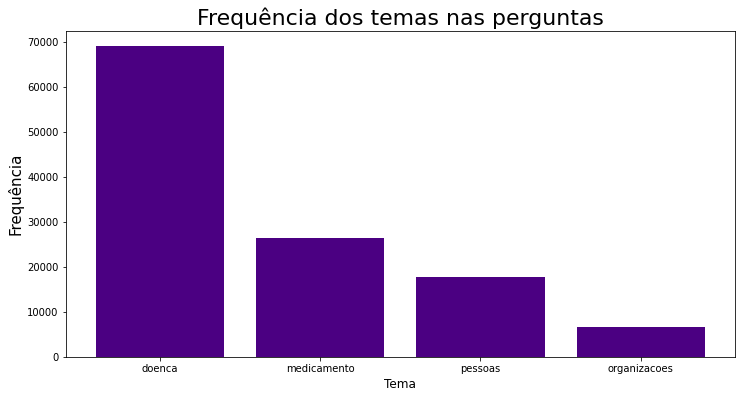

In [91]:
# Mostra frequência dos temas nas perguntas
f, ax = plt.subplots(figsize=(12,6))
ax.set_title("Frequência dos temas nas perguntas", fontsize=22)
ax.set_ylabel("Frequência", fontsize=15);
ax.set_xlabel("Tema", fontsize=12);
plt.bar(temas_frequencias_ordenado.keys(), temas_frequencias_ordenado.values(), color='indigo')
plt.show()

# **LUGARES**

Elimina as linhas com lugares nulls

Carrega csv com coordenadas de cidade do Brasil para fazer o merge

In [ ]:
lugares = df1[df1['lugar'].notnull()]

In [ ]:
cidades = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CIDADES-ESTADOS.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
cidades.head(5)

nome_cidade  longitude   latitude  UF nome_estado regiao
0    Acrelândia -66.902117  -9.832002  AC        Acre  Norte
1  Assis Brasil -69.565833 -10.939382  AC        Acre  Norte
2     Brasiléia -68.750179 -10.995393  AC        Acre  Norte
3        Bujari -67.952297  -9.833953  AC        Acre  Norte
4      Capixaba -67.676759 -10.574902  AC        Acre  Norte

In [ ]:
localizacao = pd.merge(lugares, cidades, how='left', left_on='lugar', right_on='nome_cidade')

In [ ]:
localizacao = localizacao.drop(['apelido', 'texto','retweet','seguidores','idioma','pais','sigla','hashtags','partes_dia','dia_da_semana','interrogativa'],axis=1)

In [ ]:
localizacao.groupby('regiao').regiao.count()

regiao
Centro-Oeste     308
Exterior         271
Nordeste        1755
Norte            539
Sudeste         2942
Sul             1086
Name: regiao, dtype: int64

#**Distribuição por região do brasil**

In [ ]:
cidades = localizacao.groupby(['nome_cidade']).regiao.size()
cidades.sort_values(ascending=False, inplace=True)

regiao_brasil = localizacao.groupby(['regiao']).regiao.size()
regiao_brasil.sort_values(ascending=False, inplace=True)

brasil = localizacao.groupby(['regiao','nome_cidade']).regiao.size()
brasil.sort_values(ascending=False, inplace=True)

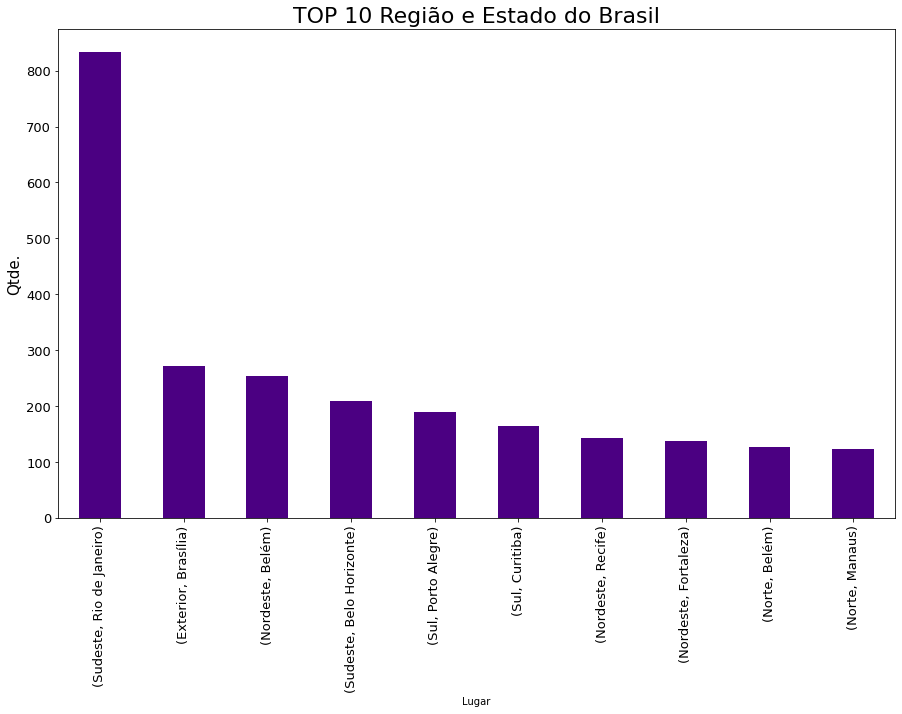

In [ ]:
ax = brasil[:10].plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("TOP 10 Região e Estado do Brasil", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Lugar", fontsize=10);
plt.show()

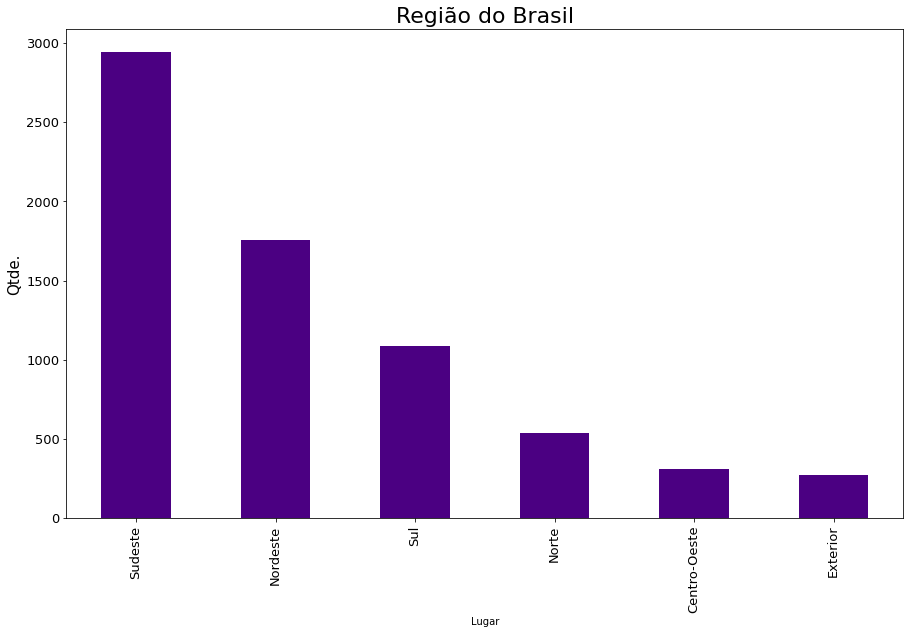

In [ ]:
ax = regiao_brasil.plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Região do Brasil", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Lugar", fontsize=10);
plt.show()

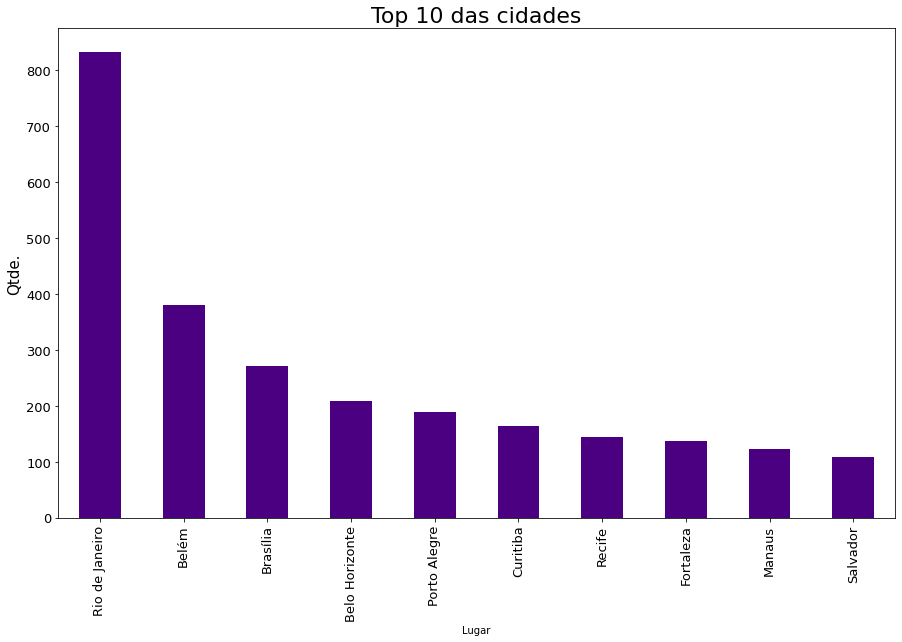

In [ ]:
ax = cidades[:10].plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 das cidades", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Lugar", fontsize=10);
plt.show()

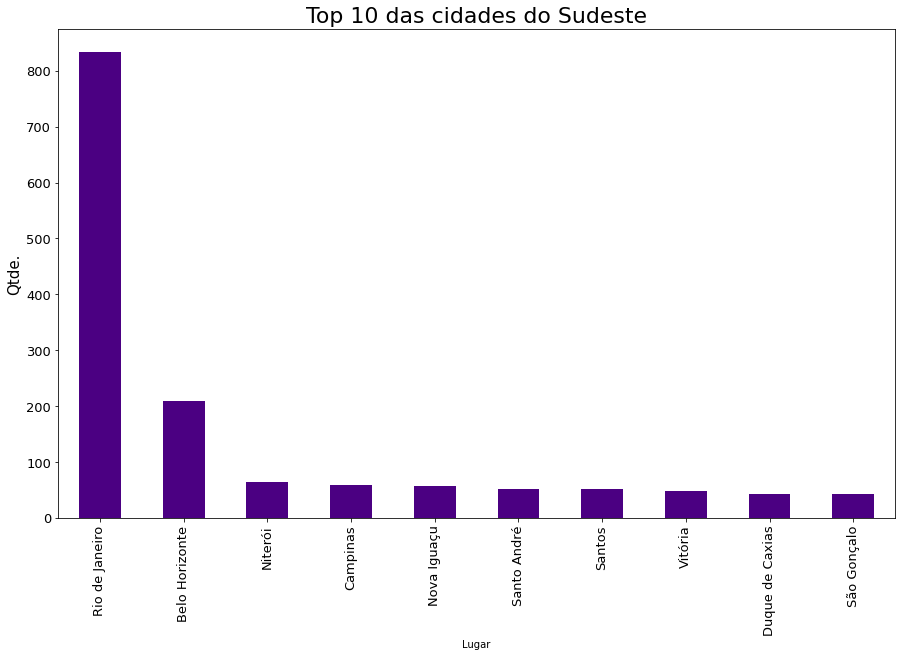

In [ ]:
sudeste = localizacao[localizacao.regiao == 'Sudeste']
sudeste = sudeste.groupby(['nome_cidade']).regiao.count()
sudeste.sort_values(ascending=False, inplace=True)
ax = sudeste[:10].plot(kind='bar', figsize=(15,9), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Top 10 das cidades do Sudeste", fontsize=22)
ax.set_ylabel("Qtde.", fontsize=15);
ax.set_xlabel("Lugar", fontsize=10);
plt.show()